In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\uber_reviews_without_reviewid.csv')
df = data.copy()
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [6]:
df.tail()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
11995,User_11995,NaN,Excellent!!!,5,0,4.553.10000,2024-11-24 21:59:16,NaN,NaN,4.553.10000
11996,User_11996,NaN,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,2024-11-24 21:56:10,NaN,NaN,4.552.10000
11997,User_11997,NaN,Exceptional,5,0,4.552.10000,2024-11-24 21:52:21,NaN,NaN,4.552.10000
11998,User_11998,NaN,Good Service.,5,0,4.553.10000,2024-11-24 21:50:30,NaN,NaN,4.553.10000
11999,User_11999,NaN,"Very bad experience with this app, booked a sh...",1,0,NaN,2024-11-24 21:44:44,NaN,NaN,NaN


In [7]:
df.shape

(12000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


In [9]:
columns_to_drop = ['userName', 'userImage', 'replyContent', 'repliedAt']
df = df.drop(columns=columns_to_drop)
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005
1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005
2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001
3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005


In [10]:
df['content'].unique()

array(['Good', 'Nice', 'Very convenient', ..., 'Excellent!!!',
       'Worst experience after 10pm in Hyde cityno auto is taking ride',
       'Very bad experience with this app, booked a short ride for 50rs but unwanted and unnamed fair is added without information and also location problem is there. Worst application.'],
      dtype=object)

In [12]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))


df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,word_count
0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005,1
1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005,1
2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001,2
3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005,1
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               12000 non-null  object
 1   score                 12000 non-null  int64 
 2   thumbsUpCount         12000 non-null  int64 
 3   reviewCreatedVersion  10260 non-null  object
 4   at                    12000 non-null  object
 5   appVersion            10260 non-null  object
 6   word_count            12000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 656.4+ KB


In [14]:
df.isnull().sum()

content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1740
at                         0
appVersion              1740
word_count                 0
dtype: int64

In [15]:
df['reviewCreatedVersion'].fillna(df['reviewCreatedVersion'].mode()[0], inplace=True)
df['appVersion'].fillna(df['appVersion'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
word_count              0
dtype: int64

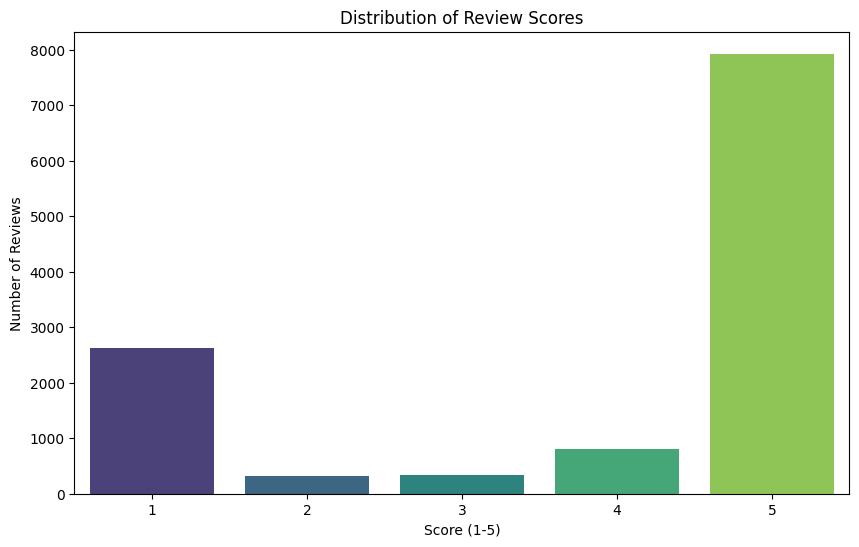

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score (1-5)')
plt.ylabel('Number of Reviews')
plt.show()

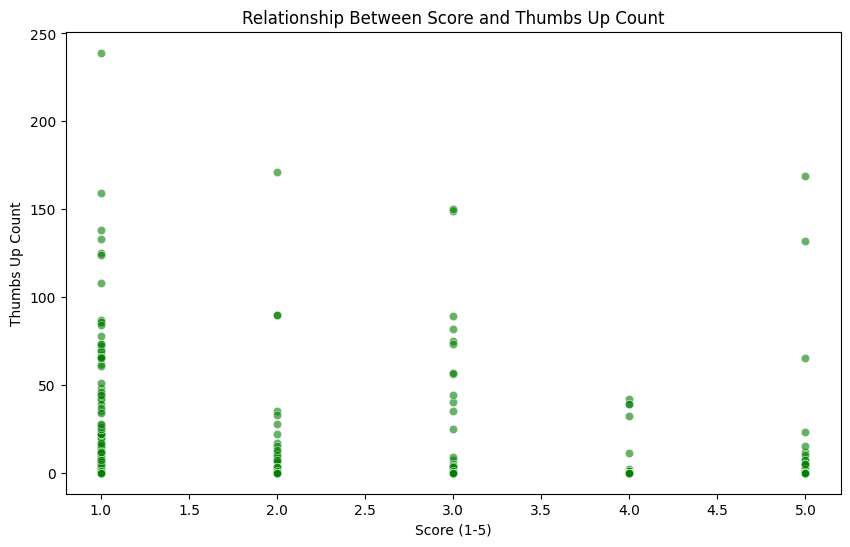

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score', y='thumbsUpCount', alpha=0.6, color='green')
plt.title('Relationship Between Score and Thumbs Up Count')
plt.xlabel('Score (1-5)')
plt.ylabel('Thumbs Up Count')
plt.show()

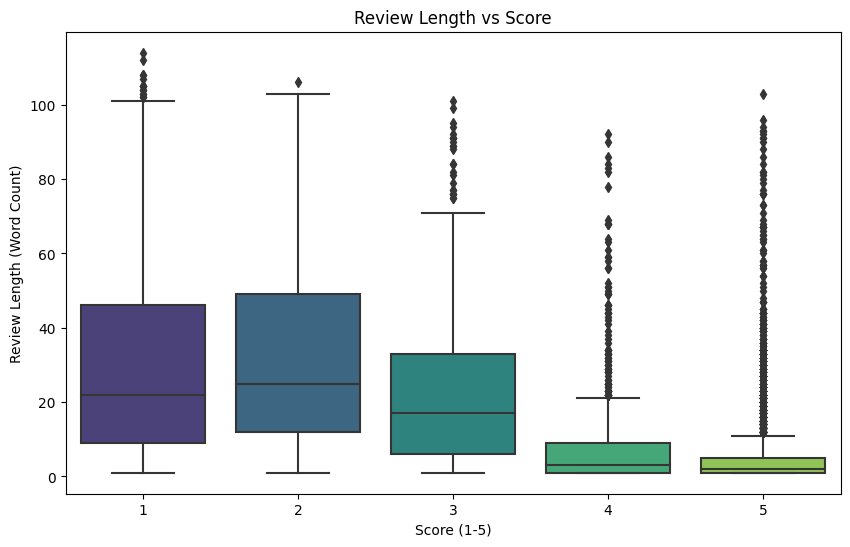

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='score', y='word_count', palette='viridis')
plt.title('Review Length vs Score')
plt.xlabel('Score (1-5)')
plt.ylabel('Review Length (Word Count)')
plt.show()

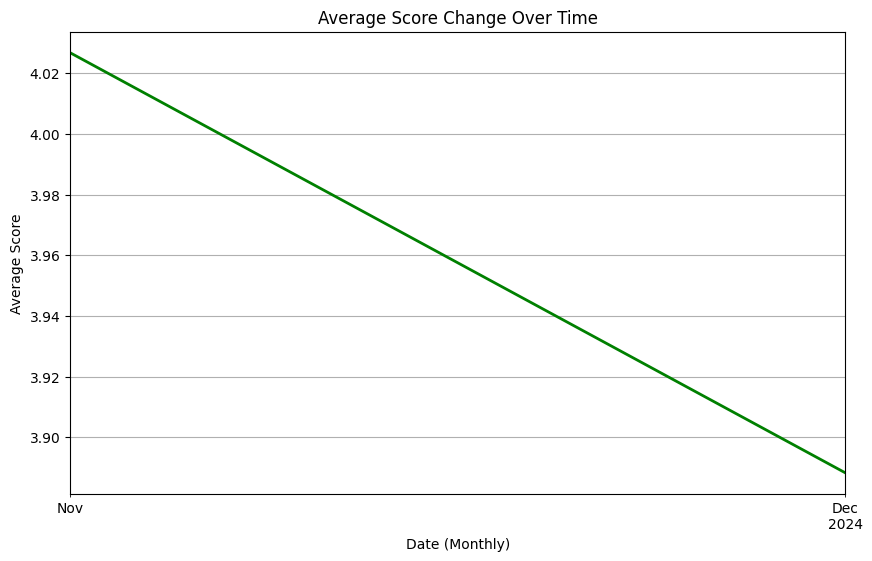

In [20]:
df['at'] = pd.to_datetime(df['at'])

df['month'] = df['at'].dt.to_period('M') 
monthly_scores = df.groupby('month')['score'].mean() 

plt.figure(figsize=(10, 6))
monthly_scores.plot(kind='line', color='green', linewidth=2)
plt.title('Average Score Change Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

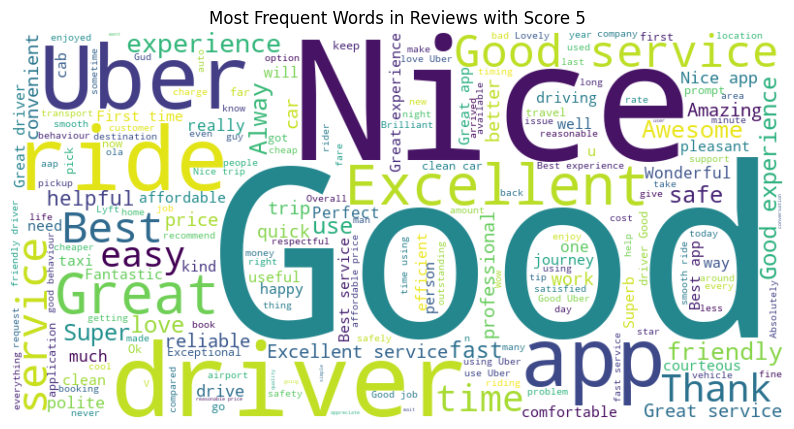

In [21]:
positive_reviews = df[df['score'] == 5]['content']


positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews with Score 5')
plt.show()

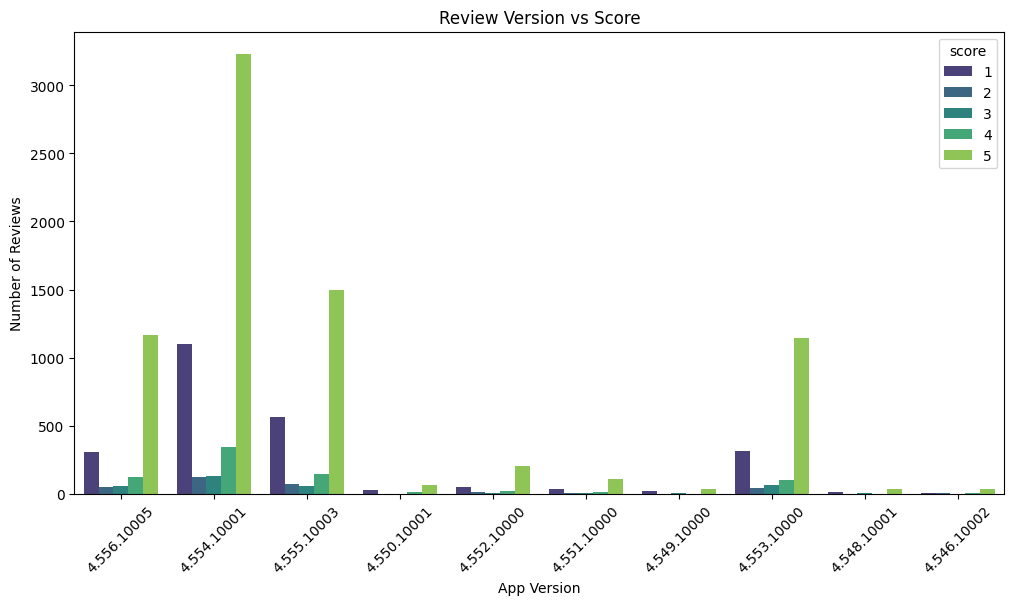

In [22]:
top_versions = df['reviewCreatedVersion'].value_counts().head(10).index


df_top_versions = df[df['reviewCreatedVersion'].isin(top_versions)]


plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_versions, x='reviewCreatedVersion', hue='score', palette='viridis')
plt.title('Review Version vs Score')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

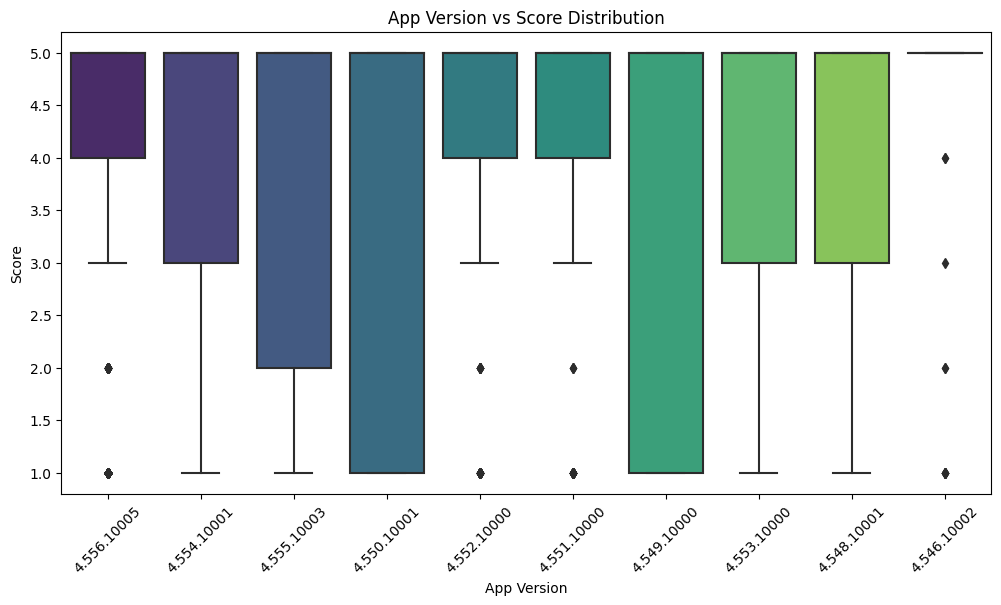

In [23]:
top_app_versions = df['appVersion'].value_counts().head(10).index


df_top_app_versions = df[df['appVersion'].isin(top_app_versions)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_app_versions, x='appVersion', y='score', palette='viridis')
plt.title('App Version vs Score Distribution')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Convert score to sentiment labels
def get_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['score'].apply(get_sentiment)

# Clean the content column (remove special characters, stopwords, etc.)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if len(word) > 1])  # Remove single-letter words
    return text

df['clean_content'] = df['content'].apply(clean_text)

# Drop rows with missing content or sentiment
df.dropna(subset=['clean_content', 'sentiment'], inplace=True)

# Split data into training and testing sets
X = df['clean_content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
lr_model = LogisticRegression(max_iter=1000)


lr_model.fit(X_train_tfidf, y_train)


lr_pred = lr_model.predict(X_test_tfidf)


print("Logistic Regression Evaluation:")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

    Negative       0.82      0.87      0.85       554
     Neutral       0.00      0.00      0.00        80
    Positive       0.94      0.97      0.96      1766

    accuracy                           0.91      2400
   macro avg       0.59      0.61      0.60      2400
weighted avg       0.88      0.91      0.90      2400

Accuracy: 0.9141666666666667


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_tfidf, y_train)


rf_pred = rf_model.predict(X_test_tfidf)


print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

    Negative       0.80      0.85      0.83       554
     Neutral       0.00      0.00      0.00        80
    Positive       0.94      0.96      0.95      1766

    accuracy                           0.90      2400
   macro avg       0.58      0.60      0.59      2400
weighted avg       0.87      0.90      0.89      2400

Accuracy: 0.9041666666666667


In [28]:
nb_model = MultinomialNB()


nb_model.fit(X_train_tfidf, y_train)


nb_pred = nb_model.predict(X_test_tfidf)


print("Naive Bayes Classifier Evaluation:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Classifier Evaluation:
              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84       554
     Neutral       0.00      0.00      0.00        80
    Positive       0.95      0.96      0.96      1766

    accuracy                           0.91      2400
   macro avg       0.58      0.61      0.60      2400
weighted avg       0.88      0.91      0.90      2400

Accuracy: 0.9116666666666666


In [29]:
svm_model = SVC(kernel='linear', random_state=42)


svm_model.fit(X_train_tfidf, y_train)


svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Evaluation:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

SVM Evaluation:
              precision    recall  f1-score   support

    Negative       0.83      0.88      0.86       554
     Neutral       0.00      0.00      0.00        80
    Positive       0.95      0.97      0.96      1766

    accuracy                           0.92      2400
   macro avg       0.59      0.62      0.61      2400
weighted avg       0.89      0.92      0.90      2400

Accuracy: 0.9183333333333333
